In [72]:
for i in range(5):
    print(i)

0
1
2
3
4


In [3]:
class A(object):
    def __init__(self, i):
        super(A, self).__init__()
        print('Class A init', i)
a = A(21930)
getattr(a, '__init__')(123)

Class A init 21930
Class A init 123


The above code snippet mainly tested the python built-in function - `getattr`, it can get attribute from a namespace, a class.

In [9]:
import tensorflow as tf
c = tf.constant(5, dtype=tf.int16)
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = a * b * c
with tf.Session() as sess:
    print('Addition with variables: %i' % sess.run(add, feed_dict={a: 2, b: 3}))
    print('Multiple with variables: %i' % sess.run(mul, feed_dict={a: 10, b: 30}))

Addition with variables: 5
Multiple with variables: 1500


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.nan)

# a = np.array(np.arange(1,601), dtype=np.float32).reshape([2,100,3]) # NWC
# kernel = tf.Variable(tf.random_normal([5,3,48], stddev=1e-3), name='conv1d-kernel')
a = tf.Variable(tf.random_normal([2,10,2], stddev=1e-3), name='input') # NWC
kernel = tf.Variable(tf.random_normal([7,2,48], stddev=1e-3), name='conv1d-kernel')
conv1d = tf.nn.conv1d(value=a, filters=kernel, stride=1, padding='VALID')
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result = sess.run(conv1d)
    print('type of conv1d result is', type(result), 'shape', result.shape)
#     print(result)

type of conv1d result is <class 'numpy.ndarray'> shape (2, 4, 48)


In [36]:
import numpy as np
import tensorflow as tf

a = tf.Variable(tf.random_normal([10, 256, 256, 3], stddev=1e-3), name='input')  # NHWC
kernel = tf.Variable(tf.random_normal([3, 3, 3, 80], stddev=1e-3), name='conv2d-kernel')  # HWCC
conv2d = tf.nn.conv2d(input=a, filter=kernel, strides=[1,2,2,1], padding='VALID') # Must have strides[0] = strides[3] = 1
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result = sess.run(conv2d)
    print('type of conv2d result is', type(result), 'shape', result.shape)

type of conv2d result is <class 'numpy.ndarray'> shape (10, 127, 127, 80)


In [15]:
import numpy as np
import tensorflow as tf

a = tf.Variable(tf.random_normal(shape=[100, 10, 3], stddev=1e-4), name='input') # NWC
k = tf.Variable(tf.random_normal(shape=[2, 3, 64], stddev=1e-4), name='kernel') # WCC
conv1d = tf.nn.conv1d(value=a, filters=k, stride=1, padding='VALID')
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result = sess.run(conv1d)
    print(result)

[[[ 1.95992040e-08  2.37941968e-08  1.80873005e-08 ...  1.63170704e-08
    6.95265756e-09  6.28922514e-09]
  [-2.60579434e-08 -1.73927859e-08 -1.48456145e-08 ... -4.12782697e-08
   -4.21614299e-09 -8.16534040e-09]
  [ 2.17885852e-08  2.57446349e-08  5.46686296e-09 ...  4.87098681e-08
   -2.84576771e-08  1.35719471e-08]
  ...
  [ 4.50929988e-10  1.45692907e-08  2.06238759e-08 ... -1.37768030e-09
    3.08578194e-08  6.87755231e-09]
  [-8.22454815e-09 -1.26069342e-08 -7.97165711e-09 ... -3.02257881e-08
   -3.28041558e-08  9.61893409e-09]
  [-1.02759201e-09 -1.70251102e-08 -6.78441259e-09 ...  3.49892559e-09
   -7.84525866e-09  2.19522192e-10]]

 [[ 1.85183886e-08  2.00813233e-08  4.91048757e-09 ...  2.99703480e-08
   -9.95487337e-09 -2.44273202e-09]
  [-2.03313171e-08 -1.79122779e-08 -1.90532479e-09 ... -3.76041456e-08
    2.12217053e-08 -5.40634870e-09]
  [-7.48213225e-09 -1.04149334e-09 -1.79712707e-08 ...  4.43120882e-08
   -6.05980688e-09 -2.64180411e-09]
  ...
  [ 1.52567914e-09  2.0

In [21]:
import numpy as np
import tensorflow as tf

a = tf.Variable(tf.random_normal(shape=[100, 48, 48, 4], stddev=1e-5), name='input')
k = tf.Variable(tf.random_normal(shape=[3, 3, 4, 64], stddev=1e-3), name='kernel')
conv2d = tf.nn.conv2d(input=a, filter=k, strides=[1, 2, 2, 1], padding='VALID', name='conv2d')
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    r = sess.run(conv2d)
    print(r)

[[[[-4.76851092e-08  4.32286136e-08 -2.46137102e-08 ... -7.75466233e-08
     2.47670648e-08 -1.12154215e-08]
   [ 2.98563307e-08  1.55649875e-08  2.13226325e-08 ...  4.20173265e-08
    -3.89692678e-09 -7.22283104e-08]
   [ 9.41353306e-08 -9.93959692e-10 -3.37935724e-08 ... -7.32439744e-08
     2.81963022e-08 -1.58812465e-08]
   ...
   [ 1.68985341e-08 -1.20177901e-07 -3.22726401e-09 ... -5.03427025e-08
     9.31019315e-08 -2.25929107e-08]
   [ 2.92590183e-08 -9.24369274e-08 -6.18498746e-08 ...  1.74426287e-08
    -6.72087594e-08 -3.12560502e-08]
   [-3.20127889e-08  8.09194489e-08  3.74764397e-08 ...  1.95294874e-08
    -4.26651816e-08 -6.00656591e-08]]

  [[ 1.91775076e-08 -1.40807529e-07 -1.63785732e-08 ...  4.04620053e-08
     1.25398330e-07 -3.66629074e-08]
   [-1.38159795e-08  8.34212344e-08  2.18527063e-08 ... -1.73763564e-08
     2.62971440e-08 -3.90997137e-08]
   [-3.47325582e-08  1.73973325e-09  3.18880602e-08 ...  4.56069564e-08
    -1.66482170e-08 -4.88813612e-08]
   ...
   

In [23]:
import numpy as np

a = np.empty(shape=[10, 2, 2], dtype=np.float64, order='C')
print(a)

[[[3.06205397e-315 3.30565308e+151]
  [1.66112017e+150 6.79053026e+199]]

 [[1.62348211e+219 3.12225996e+184]
  [4.70079879e+180 7.68755682e+170]]

 [[1.86148091e-027 1.09800774e+248]
  [7.67581388e+170 3.98222679e+209]]

 [[7.68755681e+170 5.19832524e-144]
  [3.10570901e+175 1.20179925e-081]]

 [[1.36621082e+161 4.71627991e+180]
  [2.13849125e-081 3.85691868e+174]]

 [[5.37926267e+078 4.96014248e+180]
  [7.68755682e+170 1.06304660e+224]]

 [[8.07119429e-096 6.03461182e+151]
  [4.18161497e+175 9.07680104e+223]]

 [[1.04914917e-153 3.60243195e+252]
  [9.92860910e+030 3.07933042e+175]]

 [[1.20179925e-081 1.36621082e+161]
  [4.71627991e+180 2.13849125e-081]]

 [[3.85691868e+174 4.45292596e+078]
  [5.99181544e+140 4.59481051e-322]]]


In [26]:
b = np.zeros(shape=[2, 3, 3], dtype=np.int8, order='C')
print(b)

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [27]:
c = np.ones(shape=[2, 4, 4], dtype=np.int64)
print(c)

[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


In [29]:
c = np.full(shape=[2, 1, 1], dtype=np.float16, fill_value=3)
print(c)

[[[3.]]

 [[3.]]]


In [31]:
d = np.asarray([(1, 2), (3, 4)], dtype=np.float16, order='C')
print(d)

[[1. 2.]
 [3. 4.]]


In [33]:
a = [1, 2, 3, 4, 5] # list
print('type of a: %s' % type(a))
d = np.asarray(a)
print(d)

type of a: <class 'list'>
[1 2 3 4 5]


In [34]:
x = np.arange(start=0, stop=10, step=0.2, dtype=np.float16)
print(x)

[0.     0.2    0.4    0.5996 0.8    1.     1.199  1.399  1.6    1.8
 2.     2.2    2.398  2.6    2.799  3.     3.2    3.398  3.6    3.799
 4.     4.2    4.4    4.598  4.797  5.     5.2    5.4    5.598  5.797
 6.     6.2    6.4    6.598  6.797  7.     7.2    7.4    7.598  7.797
 8.     8.195  8.4    8.6    8.8    9.     9.195  9.4    9.59   9.8   ]


In [46]:
n = np.random.rand(3, 3)
print(n)

[[0.00881809 0.39741379 0.0475974 ]
 [0.91580843 0.03899213 0.09878213]
 [0.1752231  0.22439158 0.52283354]]


In [47]:
# 生成[100.0, 200.0]的随机数
x = (200 - 100) * np.random.random(size=(2, 5)) + 100
print(x)

[[119.12687556 115.97665774 161.59666876 164.71607766 177.79795568]
 [181.40993773 199.32586704 102.60864609 122.42695741 110.51113521]]


n [0.28385261 0.14192631 0.18923507 0.23654384 0.80424906 0.94617537
 1.32464551 1.56118936 2.27082088 2.6965998  4.21048038 3.83201024
 4.06855408 4.06855408 2.93314364 3.40623132 3.16968748 2.55467349
 2.64929103 1.9396595  0.99348414 1.0407929  0.70963153 0.52039645
 0.33116138 0.09461754 0.28385261 0.         0.         0.04730877] bins [-0.28591248 -0.26477474 -0.24363701 -0.22249928 -0.20136155 -0.18022382
 -0.15908609 -0.13794836 -0.11681063 -0.0956729  -0.07453517 -0.05339744
 -0.03225971 -0.01112198  0.01001575  0.03115348  0.05229121  0.07342894
  0.09456668  0.11570441  0.13684214  0.15797987  0.1791176   0.20025533
  0.22139306  0.24253079  0.26366852  0.28480625  0.30594398  0.32708171
  0.34821944] patches <a list of 30 Patch objects>


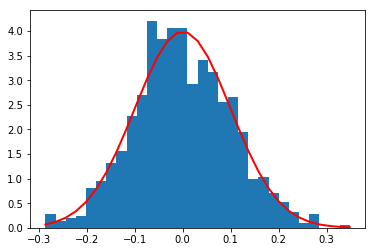

In [94]:
# 随机生成正太分布
mu, sigma = .0, 0.1  # mean and standard deviation
x = np.random.normal(loc=mu, scale=sigma, size=1000)
# print(x)
%matplotlib inline
import matplotlib.pyplot as plt
count, bins, patches = plt.hist(x=x, bins=30, density=True)
print('n', count, 'bins', bins, 'patches', patches)

plt.plot(bins, 1/(sigma*np.sqrt(2 * np.pi)) * np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth=2, color='r')
plt.show()

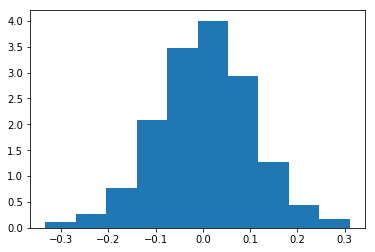

In [99]:
# 直方图是为了表明数据分布情况。通俗地说就是哪一块数据所占比例或者出现次数较高，哪一块出现概率低。
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1      # mean and standard deviation
x = np.random.normal(loc=mu, scale=sigma, size=1000)
plt.hist(x, bins=10, density=True)
plt.show()

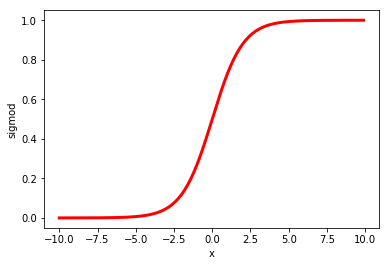

In [78]:
# 画sigmoid曲线
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(start=-10, stop=10, step=0.1)
sigmod = 1 / (1 + np.exp(-x))
plt.plot(x, sigmod, linewidth=3, color='r')
plt.xlabel('x')
plt.ylabel('sigmod')
plt.show()

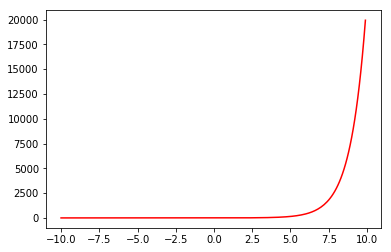

In [113]:
# 画exp(x)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(start=-10, stop=10, step=0.1)
y = np.exp(x)
plt.plot(x, y, color='r')
plt.show()

In [124]:
# softmax实现
import numpy as np

x = [-3, 5, 7, 10]
s = [0, 0, 0, 0]
for i, v in enumerate(x):
    s[i] = np.exp(v) / np.sum(np.exp(x))
print(s)

[2.139395223366356e-06, 0.006377447278532861, 0.04712331570905191, 0.9464970976171918]
